### 회귀 모델 만들어보기
* 학습 내용
  * 01. 회귀 모델에 대해 이해해 본다.
  * 02. 그래디언트 디센트에 대해 이해해 본다.

#### colab에서 시작하기

<a href="https://colab.research.google.com/github/LDJWJ/00_TOTO_MLDL_CLASS/blob/master/ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

C:\Users\front\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

1.15.0


In [3]:
x_data=[1,2,3]
y_data=[70,80,90]

In [4]:
import matplotlib.pyplot as plt

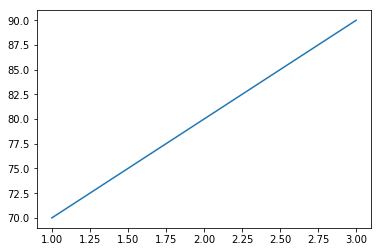

In [5]:
plt.plot(x_data, y_data)

In [6]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

### 설명
* W : 가중치(weight)
* b : 편향(bias)

In [7]:
## X, Y 플레이스 홀더로
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

hypothesis =  W * X + b

### 설명
* 손실함수(loss function) : 손실값을 계산하는 함수 
   * 손실값이란 실제값과 모델로 예측값 값이 얼마나 차이가 나는가를 나타내는 값.
   * 손실값이 작을 수록 모델이 X와 Y를 잘 설명하고 있다.
   * 손실을 전체 데이터에 대해 구한 경우, 비용(cost)라고 한다.

### 경사하강법
  * 최적화 방법 중 가장 기본적인 알고리즘
  * 그래프와 같이 함수의 기울기를 구하고, 기울기가 낮은 쪽으로 계속 이동시켜가며 최적의 값을 찾는다.
  * 학습률은 학습을 얼마나 급하게 할 것인가?
  * 학습의 진행과정에 영향을 주는 변수를 하이퍼파라미터(hyperparameter)

In [8]:
### 비용함수(cost), 최적화 함수(optimizer), 비용을 최적화
cost = tf.reduce_mean(tf.square(hypothesis - Y))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)

### 학습하기

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for step in range(100):
    _, cost_val = sess.run([train_op, cost], feed_dict={X:x_data, 
                                                            Y:y_data})
        
    print(step, cost_val, sess.run(W), sess.run(b))

print("\n=== Test ===")

0 6859.1 [33.431004] [16.061916]
1 374.5574 [29.137299] [15.477131]
2 283.19833 [29.084969] [16.726786]
3 268.86746 [28.581617] [17.747442]
4 256.08554 [28.139797] [18.765306]
5 243.9211 [27.7032] [19.756327]
6 232.3347 [27.277683] [20.723782]
7 221.29875 [26.862331] [21.667952]
8 210.78682 [26.456976] [22.589428]
9 200.77435 [26.06136] [23.488752]
10 191.23743 [25.675255] [24.366457]
11 182.15346 [25.298435] [25.223064]
12 173.5011 [24.93067] [26.059078]
13 165.25963 [24.571747] [26.874994]
14 157.40965 [24.221453] [27.671297]
15 149.93256 [23.879578] [28.448456]
16 142.81065 [23.545923] [29.206934]
17 136.02704 [23.220287] [29.947178]
18 129.56561 [22.902483] [30.669628]
19 123.41116 [22.592314] [31.37471]
20 117.549034 [22.289604] [32.062843]
21 111.96539 [21.99417] [32.734432]
22 106.64695 [21.70584] [33.389877]
23 101.581116 [21.424438] [34.029568]
24 96.75598 [21.149801] [34.653877]
25 92.15997 [20.88177] [35.26318]
26 87.78235 [20.620178] [35.857834]
27 83.612625 [20.364878] [36

In [10]:
print("hypothese = {} * X + {}".format(sess.run(W), sess.run(b) ) )
sess.close()

hypothese = [11.797594] * X + [55.913647]
